In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'mathtext.default':  'regular' })
from matplotlib.ticker import MultipleLocator
import json
import pandas as pd
from pathlib import Path

In [2]:
embodied_carbon = 26356.568
device_life_years = 5
embodied_carbon_per_sec=embodied_carbon / device_life_years / 365 / 24 / 3600

[1.69842536110139, 1.8528276666560615, 3.705655333312123, 6.3304945277415445, 75.65712972178919, 126.60989055483088] [0.3117455258785357, 0.3117455258785357, 0.3117455258785357, 0.3117455258785357, 0.3117455258785357, 0.3117455258785357] [  5.44811463   5.94339778  11.88679556  20.30660908 242.68874271
 406.13218168]


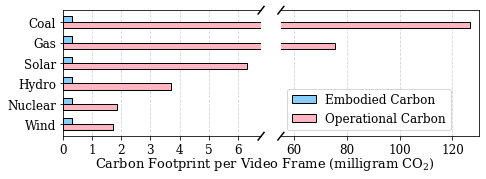

In [3]:
steps = 100
frames = 16
batch = 1
resolution = (240, 426)

energy_sources = ["Wind", "Nuclear", "Hydro", "Solar", "Gas", "Coal"]
cis = [11, 12, 24, 41, 490, 820]
y1, y2 = [], []

for ci in cis:
    with open(f"../data/char_sample_1/batch_{batch}_steps_{steps}_frames_{frames}_reso_{resolution[0]}x{resolution[1]}.json") as f:
        data = json.load(f)
    y1.append(np.mean(data["co2"]) / 100 * ci * 1.2 / frames * 1000)
    y2.append(embodied_carbon_per_sec * np.mean(data["time"]) / frames * 1000)
print(y1, y2, np.array(y1) / np.array(y2))

fig, axs = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0.4, 'wspace': 0.1, 'bottom': 0.2, 
                    'top': 0.9, 'right':0.995, 'left':0.17}, figsize=(7,2.5), sharey=True)
width = 0.3
offset = [-0.5, 0.5][::-1]
x = np.arange(len(energy_sources))
LABELS = ["Embodied Carbon", "Operational Carbon"]
colors = ["lightskyblue", "lightpink"]
ys = y2, y1
for ax in axs:
    for j, carbon_type in enumerate(ys):
        ax.barh(x+offset[j]*width, carbon_type, height=width, label=LABELS[j], color=colors[j], edgecolor="black", zorder=3)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(which='both', axis='x', color='lightgrey', ls='dashed', zorder=0)

axs[0].set_xlim(0, 6.8)
axs[1].set_xlim(55, 130)
# axs[2].set_xlim(0.9, 1.1)
axs[0].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
# axs[1].spines['left'].set_visible(False)
axs[1].tick_params(axis='y', which='both', left=False, right=False)

d = .015  # how big to make the diagonal lines in axes coordinates
d2 = 2*d
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=axs[0].transAxes, color='k', clip_on=False)
axs[0].plot((1-d, 1+d), (-d2, +d2), **kwargs)
axs[0].plot((1-d, 1+d), (1-d2, 1+d2), **kwargs)

kwargs.update(transform=axs[1].transAxes)  # switch to the bottom axes
axs[1].plot((-d, +d), (1-d2, 1+d2), **kwargs)
axs[1].plot((-d, +d), (-d2, +d2), **kwargs)

axs[0].set_yticks(np.arange(len(energy_sources)))
axs[0].set_yticklabels(energy_sources)
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_locator(MultipleLocator(20))
axs[1].legend(fontsize=12)
fig.text(0.57, 0.03, "Carbon Footprint per Video Frame (milligram CO$_2$)", ha='center', fontsize=13)

plt.savefig(f"figures/fig0_carbon.pdf", bbox_inches='tight')
